# PRONOSTICO DE VIAJES

En este articulo quiero realizar un pronóstico de los viajes en bicicletas públicas para la Ciudad de México (CDMX). Los datos son los viajes realizados durante el mes de octubre de 2018 en EcoBici. 
Se utilizará un modelo de series de tiempo ARIMA estacional. Pretendo mostrar una parte del proceso de ciencia de datos a través de este caso de estudio.

EcoBici es el sistema de bicicletas públicas de la CDMX. Es utilizado por sus habitantes y turistas como medio de transporte y recreación. Este servicio se presta desde 2010 y cuenta con más de 170 mil usuarios registrados, más de 6 mil 800 bicicletas y mas de 100 cicloestaciones distribuidas en 55 colonias de la ciudad. Fuente: https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/que-es-ecobici

### Lectura de Información
Para la lectura, limpieza y procesamiento utilizamos los dataframes de pandas.

In [1]:
import pandas as pd
viajes = pd.read_csv('2018-10.csv')

In [2]:
viajes

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,58,2176,299,01/10/2018,0:00:02,75,01/10/2018,0:12:02
1,F,42,9816,43,01/10/2018,0:00:23,256,01/10/2018,0:15:02
2,M,30,11219,37,01/10/2018,0:00:34,1,01/10/2018,0:09:09
3,M,26,3910,123,01/10/2018,0:01:36,182,01/10/2018,0:37:22
4,M,29,11487,41,01/10/2018,0:02:39,30,01/10/2018,0:11:29
...,...,...,...,...,...,...,...,...,...
784285,M,25,11515,317,30/10/2018,23:57:46,325,31/10/2018,0:01:33
784286,M,29,11647,53,30/10/2018,23:58:12,53,31/10/2018,0:07:17
784287,M,40,3120,208,30/10/2018,23:58:13,246,31/10/2018,0:03:37
784288,F,29,10983,182,30/10/2018,23:59:07,171,31/10/2018,0:04:06


## Procesamiento
Para obtener la cantidad de viajes se puede incorporar un índice temporal al dataframe y luego agrupar según la cantidad de viajes por hora. Concatenamos las columnas de fecha y hora de retiro separadas por un espacio y cambiamos el tipo de dato de string a datetime. Luego asignamos los tiempos al índice del dataframe y limpiamos posibles valores para otros meses o años. Estas tareas se pueden realizar utilizando el siguiente código:

In [3]:
from datetime import datetime

In [4]:
# concatenar Hora_Retiro y Fecha_Retiro
viajes['fecha_hora_retiro'] = viajes.Fecha_Retiro + ' ' + viajes.Hora_Retiro

# cambiar de str a datetime
viajes['fecha_hora'] = viajes.fecha_hora_retiro \
                             .map(lambda x : datetime.strptime(x, '%d/%m/%Y %H:%M:%S'))

# reindexar el dataframe
viajes.index = viajes.fecha_hora

# limpiar valores de otros años
viajes = viajes.loc['2018-10']

In [7]:
viajes

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora
fecha_hora,,,,,,,,,,,
2018-10-01 00:00:02,M,58,2176,299,01/10/2018,0:00:02,75,01/10/2018,0:12:02,01/10/2018 0:00:02,2018-10-01 00:00:02
2018-10-01 00:00:23,F,42,9816,43,01/10/2018,0:00:23,256,01/10/2018,0:15:02,01/10/2018 0:00:23,2018-10-01 00:00:23
2018-10-01 00:00:34,M,30,11219,37,01/10/2018,0:00:34,1,01/10/2018,0:09:09,01/10/2018 0:00:34,2018-10-01 00:00:34
2018-10-01 00:01:36,M,26,3910,123,01/10/2018,0:01:36,182,01/10/2018,0:37:22,01/10/2018 0:01:36,2018-10-01 00:01:36
2018-10-01 00:02:39,M,29,11487,41,01/10/2018,0:02:39,30,01/10/2018,0:11:29,01/10/2018 0:02:39,2018-10-01 00:02:39
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-30 23:57:46,M,25,11515,317,30/10/2018,23:57:46,325,31/10/2018,0:01:33,30/10/2018 23:57:46,2018-10-30 23:57:46
2018-10-30 23:58:12,M,29,11647,53,30/10/2018,23:58:12,53,31/10/2018,0:07:17,30/10/2018 23:58:12,2018-10-30 23:58:12
2018-10-30 23:58:13,M,40,3120,208,30/10/2018,23:58:13,246,31/10/2018,0:03:37,30/10/2018 23:58:13,2018-10-30 23:58:13


El próximo paso es la agrupación de viajes por hora. 

In [5]:
# resample y agregacion por dia de mes
viajes_resample_day = viajes.Bici.resample('H').count()

In [6]:
viajes_resample_day

fecha_hora
2018-10-01 00:00:00      47
2018-10-01 01:00:00       0
2018-10-01 02:00:00       0
2018-10-01 03:00:00       0
2018-10-01 04:00:00       0
                       ... 
2018-10-31 19:00:00    2360
2018-10-31 20:00:00    1443
2018-10-31 21:00:00     821
2018-10-31 22:00:00     566
2018-10-31 23:00:00     261
Freq: H, Name: Bici, Length: 744, dtype: int64

In [8]:
# asignar día de la semana
df_resample = pd.concat([viajes_resample_day], axis=1)
df_resample['dayofweek'] = df_resample.index.dayofweek # 0 es lunes

# lunes a viernes
df_mon_to_fri = df_resample[df_resample.dayofweek.isin([0,1,2,3,4])].Bici

In [9]:
df_mon_to_fri

fecha_hora
2018-10-01 00:00:00      47
2018-10-01 01:00:00       0
2018-10-01 02:00:00       0
2018-10-01 03:00:00       0
2018-10-01 04:00:00       0
                       ... 
2018-10-31 19:00:00    2360
2018-10-31 20:00:00    1443
2018-10-31 21:00:00     821
2018-10-31 22:00:00     566
2018-10-31 23:00:00     261
Name: Bici, Length: 552, dtype: int64

La gráfica de la primera semana de octubre es la siguiente:

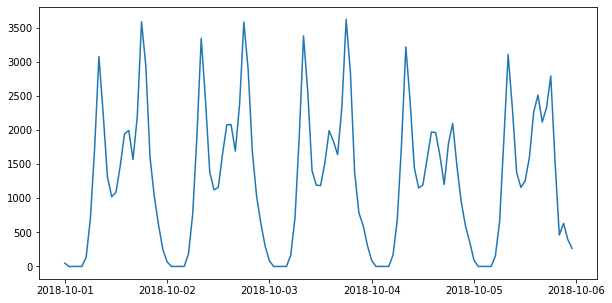

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.plot(df_mon_to_fri.index[:24*5], df_mon_to_fri[:24*5])
plt.show()

Los datos empiezan a contar una historia. Para cada día ocurre un primer pico en en las mañanas, posiblemente sea gente que va a trabajar. Hay otro pico al rededor de las 2pm, que suele ser la hora de la comida y el descanso. Por último, la mayor cantidad de viajes ocurre a partir de las 6pm, cuando ya vamos de regreso a casa y alguno que otro sale a pasear en bici en la noche (como yo). Este patrón se repite con cierta regularidad cada 24 horas. Es nuestro trabajo como científicos de datos capturar esa historia en un modelo estadístico, que es el objetivo de la siguiente sección.

## Modelos para series de tiempo

En Python existe una implementación del SARIMA en el módulo statsmodels. Este módulo posee ademas clases y funciones para la estimación de diferentes modelos estadísticos.

Esta familia de modelos suele denotarse como SARIMA(p,d,q)(P,D,Q)[m]. Los términos (p,d,q) se refieren a los términos autoregresivos, integrados y de media móvil respectivamente. Los términos (P,D,Q) se refieren a la parte estacional de los mismos términos, con m periodos. En nuestro caso nos interesa una estacionalidad de 24 periodos (horas). El resto de los términos ha sido escogido por ensayo y error (minimizando el AIC). Luego de varias pruebas nos quedamos con la familia SARIMA(2,0,1)x(2,1,0)[24].

Para estimar los parámetros y el AIC del modelo utilizamos el siguiente código:

In [8]:
#!pip install statsmodels

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
x = df_mon_to_fri

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

d:\trabajo\bpc\venv\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
d:\trabajo\bpc\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
d:\trabajo\bpc\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


7113.31534339332

In [34]:
2 * len(results.params) + len(x) * np.log(sum(results.resid ** 2) / len(x))

6570.040512894213

El criterio de información de Akaike (AIC) es una medida de la calidad relativa de un modelo estadístico, para un conjunto dado de datos. Como tal, el AIC proporciona un medio para la selección del modelo.

AIC maneja un trade-off entre la bondad de ajuste del modelo y la complejidad del modelo. Se basa en la entropía de información: se ofrece una estimación relativa de la información perdida cuando se utiliza un modelo determinado para representar el proceso que genera los datos.

AIC no proporciona una prueba de un modelo en el sentido de probar una hipótesis nula, es decir AIC no puede decir nada acerca de la calidad del modelo en un sentido absoluto. Si todos los modelos candidatos encajan mal, AIC no dará ningún aviso de ello.

Ahora podemos calcular los pronósticos para los siguientes días de la semana.

## Pronósticos

Para observar los pronósticos generamos una gráfica con la estimación puntual y de intervalos para el resto de la semana. Como el 31 de octubre de 2018 fue miércoles, se presentan las estimaciones para los primeros dos días de noviembre, jueves y viernes. De esta forma se puede apreciar como el modelo captura el patrón del comportamiento de los viajes en bici.

d:\trabajo\bpc\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\trabajo\bpc\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


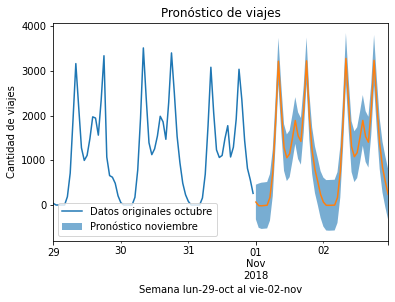

In [16]:
# tomar de datos originales dias 29-oct, 30-oct, y 31-oct
df_29_31 = df_mon_to_fri.loc['2018-10-29':'2018-10-31']
df_29_31.plot()

# agregar bandas de confianza
pred_1_2_conf = results.get_forecast(steps=24*2).conf_int()
pred_1_2_conf.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
x = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
y1 = pred_1_2_conf['lower Bici']
y2 = pred_1_2_conf['upper Bici']
plt.fill_between(x, y1, y2, alpha=0.6)

# predecir para 1-nov y 2-nov
pred_1_2 = results.get_forecast(steps=24*2).predicted_mean
pred_1_2.index = pd.date_range(start='11/1/2018', end='11/3/2018', freq='H')[:-1]
pred_1_2.plot()

# formato de la grafica final
plt.title('Pronóstico de viajes')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana lun-29-oct al vie-02-nov')
plt.legend(('Datos originales octubre', 'Pronóstico noviembre'),
           loc='lower left')
plt.savefig('pronostico.png')
plt.show()

## Conclusiones
A lo largo de este análisis hemos recorrido distintas etapas del proceso de ciencia de datos. En resumen:

- Se descargaron datos públicos del sistema de EcoBici.
- Se transformaron entradas de texto en índices temporales.
- Se agruparon los datos para obtener a cantidad de viajes por hora y por día de la semana.
- Se discutió sobre modelos autoregresivos.
- Se ajustó un modelo SARIMA a nuestros datos.
- Se pronosticó la cantidad de viajes para los primeros días de noviembre.